In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# Load your temperature change data
data = pd.read_csv('/Users/tinklejain1997/Desktop/all countries global temperature.csv')
data2= pd.read_csv('/Users/tinklejain1997/Desktop/historical_emissions.csv')

# Define the list of top countries (modify if necessary)
top_countries = ['World']
 #['China', 'United States', 'India', 'European Union (27)', 'Russia', 'Japan']

# Filter the data for the top countries
temp_data = data[data['Country Name'].isin(top_countries)]
emission =data2[data2['Country'].isin(top_countries)]
temp_data
emission = emission.drop(['Country','Data source','Sector','Gas','Unit'],axis=1	)
temp_data = temp_data.drop(['ObjectId','Country Name','Unit','Change '],axis=1)
#temp_data.head().head()
temp_data.drop([ '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
              '1981', '1982', '1983', '1984', '1985','1986', '1987', '1988', '1989','2019','2020','2021'], axis=1, inplace=True)
temp_transposed = temp_data.T
emission_transposed = emission.T

#print(len(temp_data),len(emission))
#df_note = df.loc[df.n == "d", ["a", "b"]].values

col_list = temp_transposed[223].values.tolist()
row_list= emission_transposed[0].values.tolist()

#print(row_list[::-1])

#row_list = temp_data.loc[1, :].values.flatten().tolist()
#col_list = emission.loc[1, :].values.flatten().tolist()
corr, p_value = pearsonr(col_list,row_list[::-1])
print(f"Pearson correlation: {corr}, P-value: {p_value}")


Pearson correlation: 0.8322952327841462, P-value: 2.17439888533522e-08


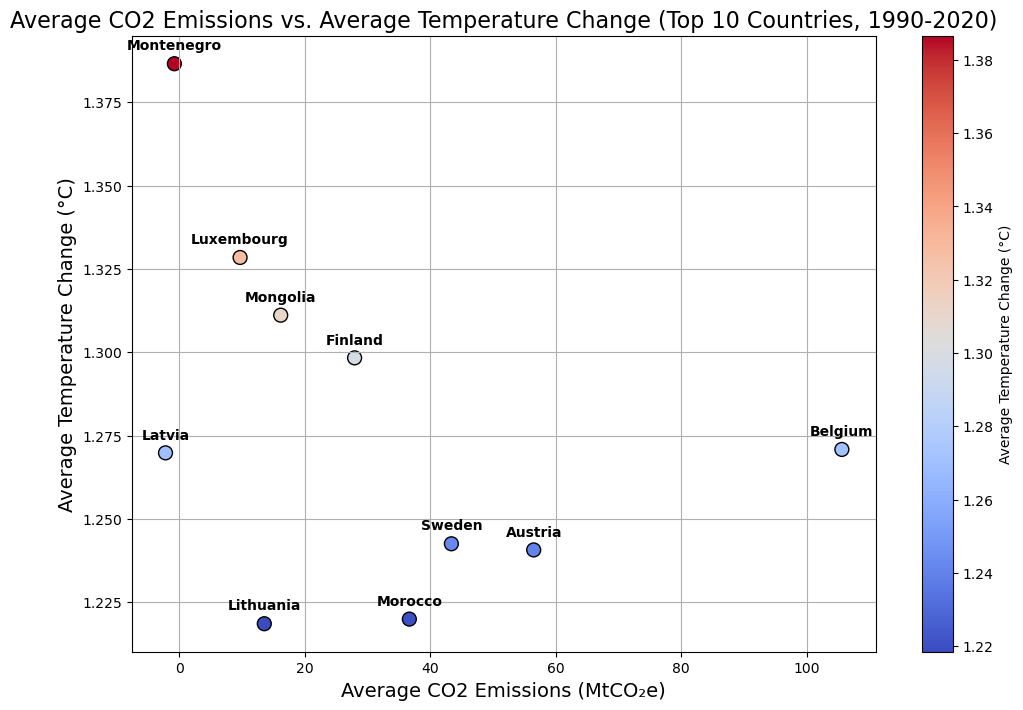

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CO2 emissions data
emissions_data = pd.read_csv('/Users/tinklejain1997/Desktop/historical_emissions.csv')

# Filter emissions data for the period 1990-2020
years_emissions = [str(year) for year in range(1990, 2016)]
emissions_data_filtered = emissions_data[['Country'] + years_emissions]
emissions_data_filtered.set_index('Country', inplace=True)
emissions_data_filtered = emissions_data_filtered.apply(pd.to_numeric, errors='coerce')

# Calculate average emissions for each country
average_emissions = emissions_data_filtered.mean(axis=1)

# Load temperature change data
temperature_data = pd.read_csv('/Users/tinklejain1997/Desktop/all countries global temperature.csv')

# Filter temperature data for the period 1990-2020
years_temp = [str(year) for year in range(1990, 2016)]
temperature_data_filtered = temperature_data[['Country Name'] + years_temp]
temperature_data_filtered.set_index('Country Name', inplace=True)
temperature_data_filtered = temperature_data_filtered.apply(pd.to_numeric, errors='coerce')

# Calculate average temperature change for each country
average_temperature_change = temperature_data_filtered.mean(axis=1)

# Create DataFrames for average temperature changes and emissions
temperature_change_df = pd.DataFrame({
    'Country': average_temperature_change.index,
    'Average Temperature Change': average_temperature_change.values
})

emissions_df = pd.DataFrame({
    'Country': average_emissions.index,
    'Average CO2 Emissions': average_emissions.values
})

# Merge datasets
merged_df = pd.merge(temperature_change_df, emissions_df, on='Country')

# Get the top 10 countries with the highest average temperature changes
top_10_countries = merged_df.sort_values(by='Average Temperature Change', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
scatter = plt.scatter(top_10_countries['Average CO2 Emissions'], top_10_countries['Average Temperature Change'],
                      c=top_10_countries['Average Temperature Change'], cmap='coolwarm', edgecolors='k', s=100)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Average Temperature Change (°C)')

# Add titles and labels
plt.title('Average CO2 Emissions vs. Average Temperature Change (Top 10 Countries, 1990-2020)', fontsize=16)
plt.xlabel('Average CO2 Emissions (MtCO₂e)', fontsize=14)
plt.ylabel('Average Temperature Change (°C)', fontsize=14)
plt.grid(True)

# Annotate points with country names
for i, row in top_10_countries.iterrows():
    plt.annotate(row['Country'],
                 (row['Average CO2 Emissions'], row['Average Temperature Change']),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontsize=10,
                 weight='bold')

plt.show()


In [2]:
pip install "fuzzywuzzy[speedup]"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
from fuzzywuzzy import process
import pandas as pd
from scipy.stats import pearsonr
import plotly.express as px
import numpy as np
# Load the temperature and emissions data
temperature_data = pd.read_csv('/Users/tinklejain1997/Desktop/all countries global temperature.csv')
emission_data = pd.read_csv('/Users/tinklejain1997/Desktop/historical_emissions.csv')
temperature_data.rename(columns={'Country Name': 'Country'}, inplace=True)
#temperature_data.drop([ '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
#              '1981', '1982', '1983', '1984', '1985','1986', '1987', '1988', '1989','2019','2020','2021'], axis=1)
# Clean the data: Remove unnecessary columns
temperature_data_cleaned = temperature_data.drop(['ObjectId', 'Unit', 'Change ','1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
              '1981', '1982', '1983', '1984', '1985','1986', '1987', '1988', '1989','2019','2020','2021'], axis=1)
emission_data_cleaned = emission_data.drop(['Data source', 'Sector', 'Gas', 'Unit'], axis=1)
#emission_data_cleaned=emission_data_cleaned[::-1]
new_order = ['Country'] + [str(year) for year in range(1990, 2019)]

# Reorder the DataFrame columns
emission_data_cleaned = emission_data_cleaned[new_order]
#print(list(emission_data_cleaned))
# Get country lists
temp_countries = temperature_data_cleaned['Country'].unique()
emission_countries = emission_data_cleaned['Country'].unique()

# Create a mapping dictionary by fuzzy matching temperature data country names to emission data country names
country_name_mapping = {}
for temp_country in temp_countries:
    match, score = process.extractOne(temp_country, emission_countries)
    if score >= 80:  # Only map if similarity score is above 80 (you can adjust this threshold)
        country_name_mapping[temp_country] = match
#print(country_name_mapping)
# Apply the mapping to the temperature data
temperature_data_cleaned['Country'] = temperature_data_cleaned['Country'].replace(country_name_mapping)
##print(temperature_data_cleaned['Country'])
# Get the common countries after mapping the names
common_countries = set(temperature_data_cleaned['Country']).intersection(emission_data_cleaned['Country'])
#print(len(common_countries))
# Filter the data to include only the common countries
temp_data_filtered = temperature_data_cleaned[temperature_data_cleaned['Country'].isin(common_countries)]
emission_data_filtered = emission_data_cleaned[emission_data_cleaned['Country'].isin(common_countries)]

# Transpose the data so that years become rows and countries become columns
temp_data_transposed = temp_data_filtered.set_index('Country').T
emission_data_transposed = emission_data_filtered.set_index('Country').T
temp_data_transposed.replace(np.nan, 0, inplace=True)
emission_data_transposed.replace(np.nan, 0, inplace=True)
#emission_data_transposed.head()
# Dictionary to store correlation values for each country
correlation_data = {'Country': [], 'Correlation': []}


In [6]:
# If temp_data_transposed has multiple columns per country, reduce it to one column (mean or a specific column)
temp_data_transposed_reduced = temp_data_transposed.groupby(temp_data_transposed.columns, axis=1).mean()

# Align emission data similarly
emission_data_transposed_reduced = emission_data_transposed.groupby(emission_data_transposed.columns, axis=1).mean()

# Calculate the Pearson correlation after reducing the dimensions
for country in common_countries:
    temp_values = temp_data_transposed_reduced[country].values
    emission_values = emission_data_transposed[country].values
    if len(temp_values) == len(emission_values):
        corr, p_value = pearsonr(temp_values, emission_values)
        correlation_data['Country'].append(country)
        correlation_data['Correlation'].append(corr)
    else:
        correlation_data['Country'].append(country)
        correlation_data['Correlation'].append(None)  # No correlation if data lengths don't match
correlation_df = pd.DataFrame(correlation_data)
# Plot using plotly.express choropleth
fig = px.choropleth(correlation_df,
                    locations="Country",
                    locationmode="country names",
                    color="Correlation",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Pearson Correlation between Temperature Change and CO2 Emissions 1990-2018")

# Show the plot
fig.show()
fig.write_html("Pearson_Correlation.html")

/var/folders/r9/7ct_rjnn495gbht15v318gh40000gn/T/ipykernel_41271/3507343854.py:2: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

/var/folders/r9/7ct_rjnn495gbht15v318gh40000gn/T/ipykernel_41271/3507343854.py:5: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

/var/folders/r9/7ct_rjnn495gbht15v318gh40000gn/T/ipykernel_41271/3507343854.py:12: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

